<a href="https://colab.research.google.com/github/Imran1hp/Machine-Learning/blob/main/Rossmann_store_sales_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

!pip install numpy pandas-profiling matplotlib plotly seaborn --quiet

In [9]:
!pip install opendatasets --upgrade --quiet

In [10]:
import os
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imranlaskar123
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 730MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [11]:
os.listdir('rossmann-store-sales')

['sample_submission.csv', 'store.csv', 'train.csv', 'test.csv']

In [12]:
ross_df = pd.read_csv("./rossmann-store-sales/train.csv",low_memory=False)


In [13]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [14]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv')


In [15]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [40]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [17]:
merged_df.shape

(1017209, 18)

In [26]:
test_df=pd.read_csv('./rossmann-store-sales/test.csv')

In [27]:
merged_test_df = test_df.merge(store_df, how='left',on = 'Store')

In [29]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [31]:
round(merged_df.describe().T,2)

,count,mean,min,25%,50%,75%,max,std
Store,1017209.0,558.429727,1.0,280.0,558.0,838.0,1115.0,321.908651
DayOfWeek,1017209.0,3.998341,1.0,2.0,4.0,6.0,7.0,1.997391
Date,1017209,2014-04-11 01:30:42.846061824,2013-01-01 00:00:00,2013-08-17 00:00:00,2014-04-02 00:00:00,2014-12-12 00:00:00,2015-07-31 00:00:00,NaN
Sales,1017209.0,5773.818972,0.0,3727.0,5744.0,7856.0,41551.0,3849.926175
Customers,1017209.0,633.145946,0.0,405.0,609.0,837.0,7388.0,464.411734
Open,1017209.0,0.830107,0.0,1.0,1.0,1.0,1.0,0.375539
Promo,1017209.0,0.381515,0.0,0.0,0.0,1.0,1.0,0.485759
SchoolHoliday,1017209.0,0.178647,0.0,0.0,0.0,0.0,1.0,0.383056
CompetitionDistance,1014567.0,5430.085652,20.0,710.0,2330.0,6890.0,75860.0,7715.3237
CompetitionOpenSinceMonth,693861.0,7.222866,1.0,4.0,8.0,10.0,12.0,3.211832


In [32]:
merged_df.duplicated().sum()

np.int64(0)

In [74]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)


In [75]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [38]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [39]:
merged_df.Date.min(),merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

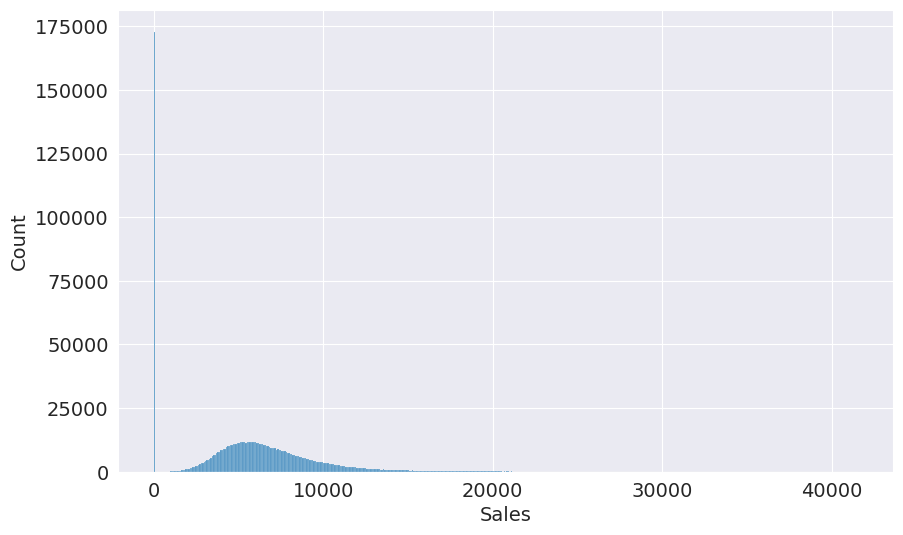

In [41]:
sns.histplot(data=merged_df, x='Sales')

In [43]:
merged_df.Sales.value_counts()[0]

np.int64(172871)

In [44]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


In [45]:
merged_df = merged_df[merged_df.Open ==1].copy()

In [46]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


<Axes: xlabel='Sales', ylabel='Count'>

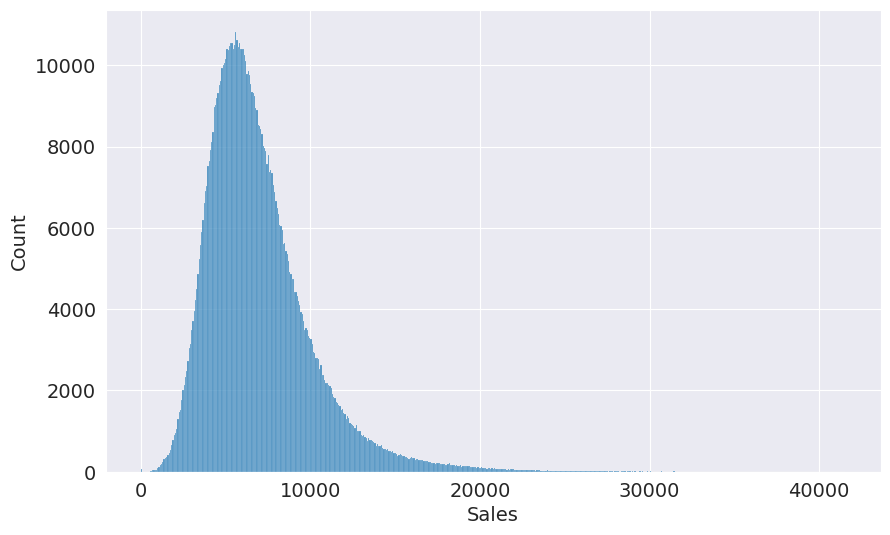

In [56]:
sns.histplot(data=merged_df, x='Sales')

<Axes: xlabel='Sales', ylabel='Customers'>

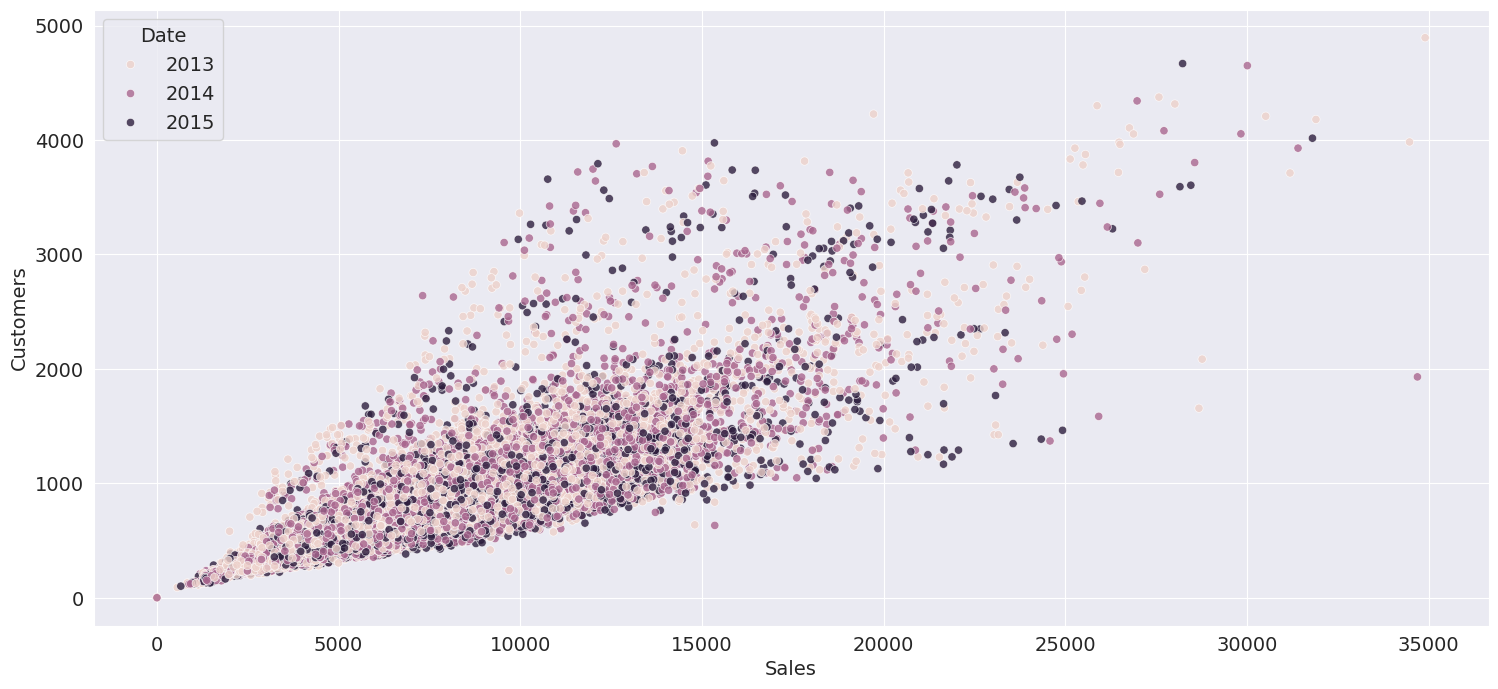

In [59]:
plt.figure(figsize =(18,8))
temp_df = merged_df.sample(40000).copy()
temp_df['Date'] = pd.to_datetime(temp_df['Date'])
sns.scatterplot(x=temp_df.Sales,y=temp_df.Customers,hue=temp_df.Date.dt.year,alpha=0.8)

<Axes: xlabel='Store', ylabel='Sales'>

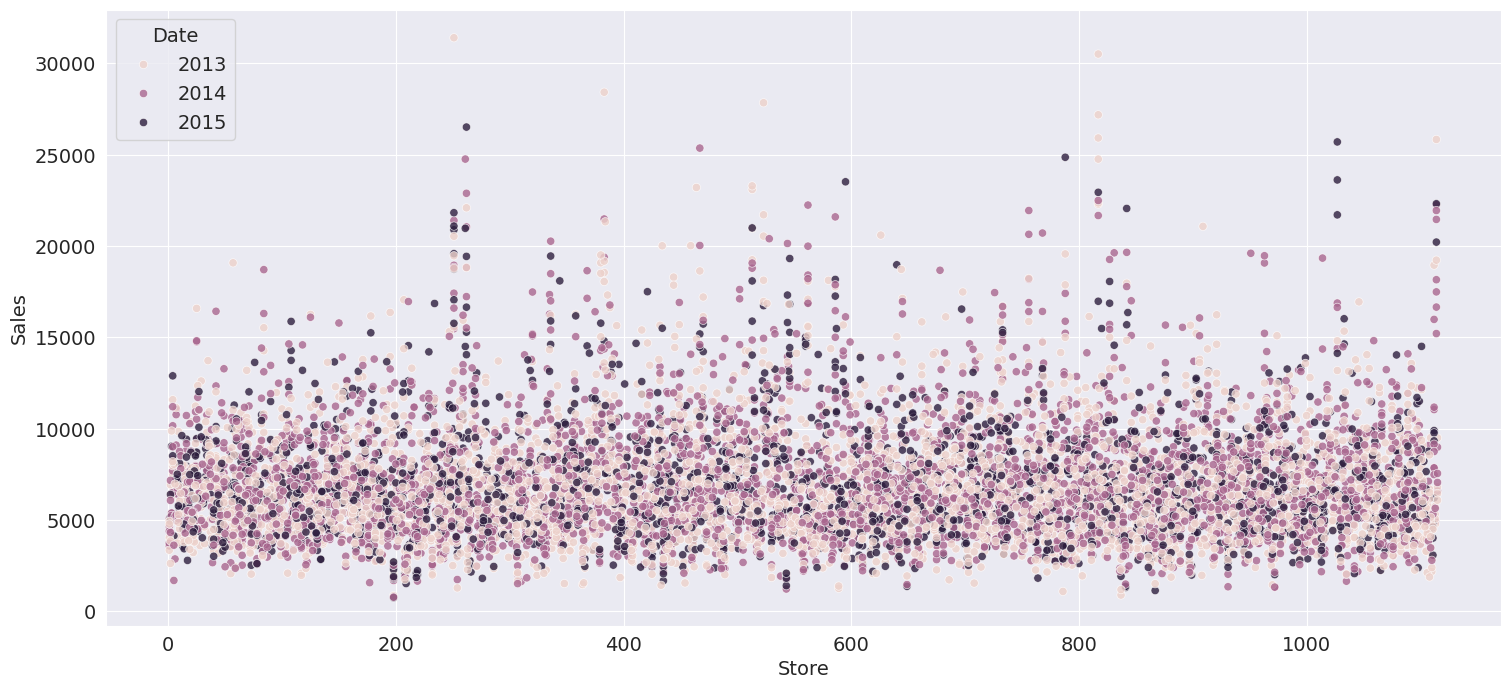

In [63]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
temp_df['Date'] = pd.to_datetime(temp_df['Date'])
sns.scatterplot(x=temp_df.Store , y=temp_df.Sales,hue=temp_df.Date.dt.year,alpha=0.8)

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

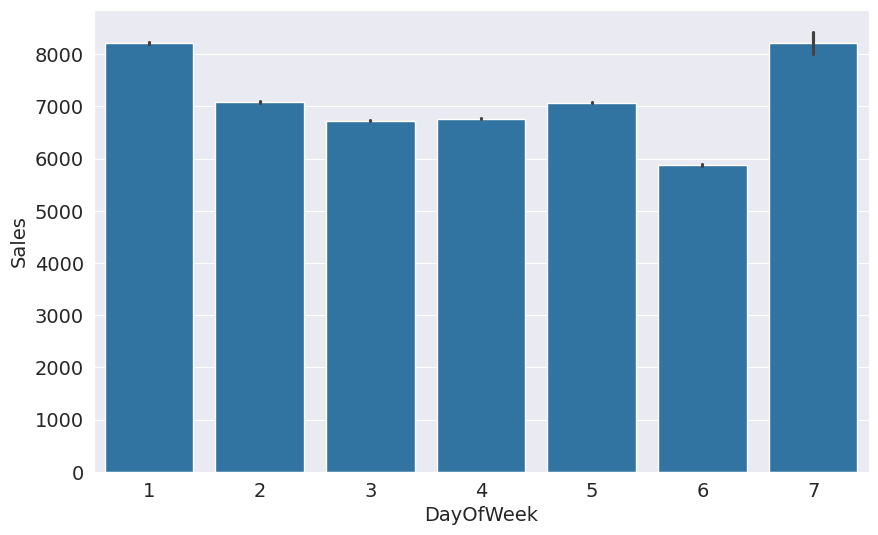

In [64]:
sns.barplot(data=merged_df,x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

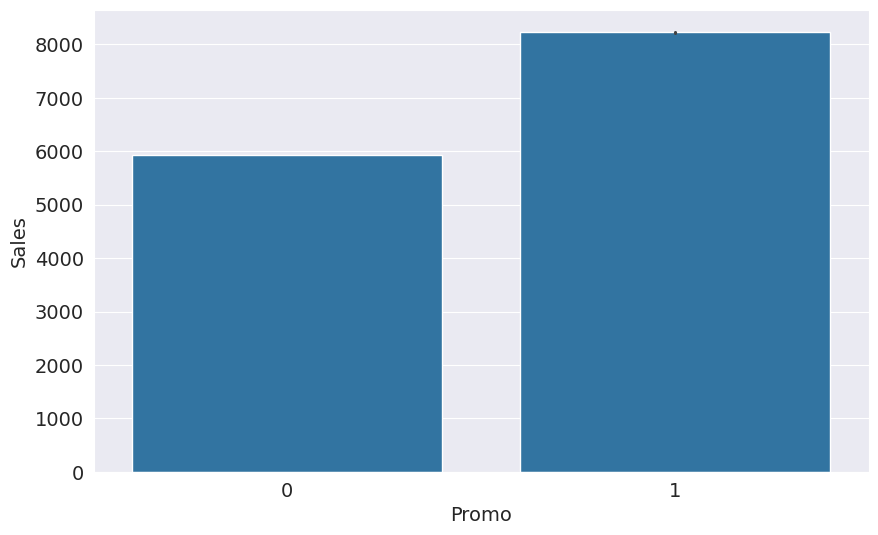

In [66]:
sns.barplot(data=merged_df, x = 'Promo',y='Sales')

In [70]:
merged_df.drop(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], axis=1).corr()['Sales'].sort_values(ascending=False)

,Sales
Sales,1.000000
Customers,0.823597
Promo,0.368145
Promo2SinceWeek,0.095311
SchoolHoliday,0.038617
CompetitionOpenSinceYear,0.016101
Store,0.007710
Promo2SinceYear,-0.034713
CompetitionDistance,-0.036396
CompetitionOpenSinceMonth,-0.043489


In [76]:

merged_df['Day']= merged_df.Date.dt.day
merged_df["Month"]=merged_df.Date.dt.month
merged_df['Year']= merged_df.Date.dt.year

In [78]:
merged_test_df['Day']=merged_df.Date.dt.day
merged_test_df['Month']=merged_df.Date.dt.month
merged_test_df['Year']=merged_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

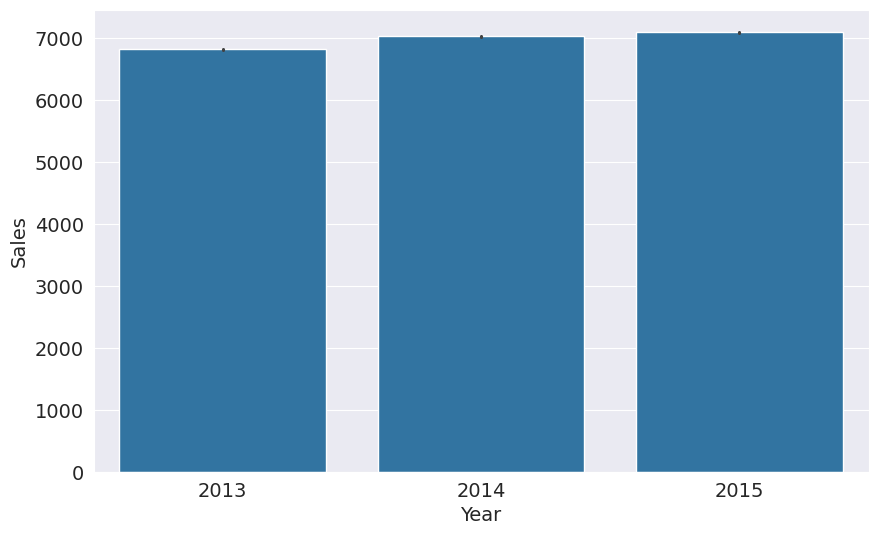

In [79]:
sns.barplot(data=merged_df,x='Year',y="Sales")

<Axes: xlabel='Month', ylabel='Sales'>

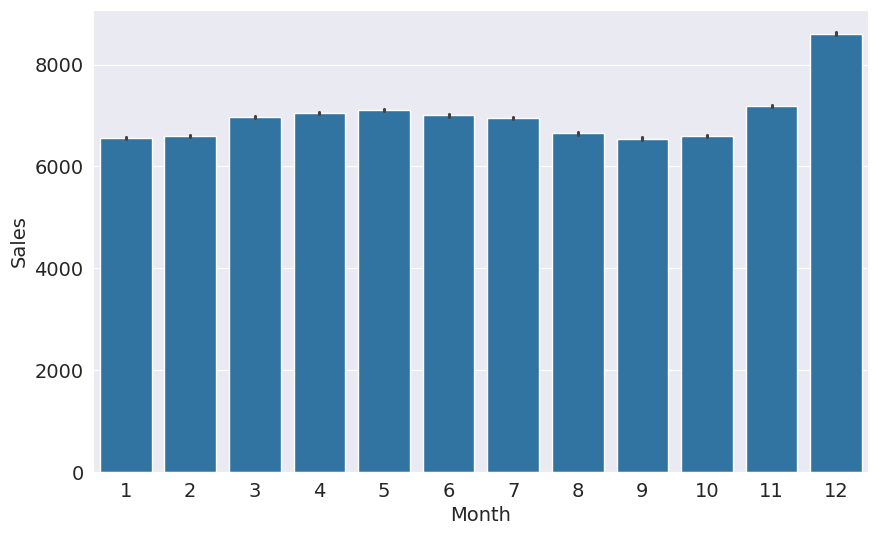

In [80]:
sns.barplot(data=merged_df,x='Month',y='Sales')

<Axes: xlabel='Day', ylabel='Sales'>

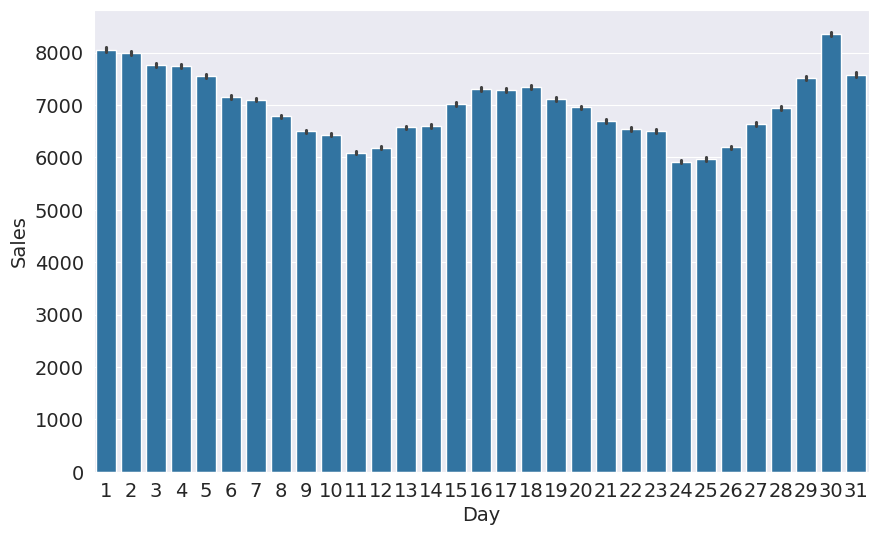

In [81]:
sns.barplot(data = merged_df,x='Day',y='Sales')